
# Project: No-show appointments analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> The chosen data set is a collection of data for patients at a medical facility in Brazil. it is from 100k appointments collecting a range of data points about the patient. I will be exploring if any of the data points affects whether the patient will show up for their appointment or not. After cleaning the data I will see:
> - does age affect if someone will show up for the appointment?
> - does gender make a difference to who shows up?
> - if someone receives an SMS will they be more likely to arrive at their appointment?

Column descriptions

> - gender = recorded gender of the patient
> - age = patient's age
> - neighbourhood = location of the hospital
> - scholarship = if a patient is enrolled in the welfare program
> - hypertension = if a patient is diagnosed with hypertension
> - diabetes = if a patient is diagnosed with diabetes
> - sms_received = if the patient received a reminder sms before the appointment
> - no_show = did the patient arrive at the appointment in this case 0 = they arrived. 1 = they missed the appointment




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_no = pd.read_csv('noshowappointments.csv')
df_no.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


**Inspecting the data**
> - checking if there are any null values
> - for anything interesting within unique values
> - making sure to remove any duplicates
> - convert data types such as no-show into 0 and 1
> - change column name no-show to be more clear
> -  change no show to be a true/false statement
> - change Hipertension	Diabetes	Alcoholism	Handcap into one column 

In [3]:
print(df_no.shape)
print(df_no.info())

(110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [4]:
df_no.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_no.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df_no.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df_no.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df_no.PatientId.duplicated().sum()

48228

In [9]:
df_no.AppointmentID.duplicated().sum()

0

In [10]:
df_no.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

### Data Cleaning
**Dropping extra columns/duplicate rows that are not needed**
>
> - Schdule day as i think that is not relevent as its the date the patient set up their appointment, not when it was due.  
> - Appointment day as there are only 27 unique values 

In [11]:
df_no.drop(['ScheduledDay','AppointmentDay'], axis=1, inplace=True)

**Formatting the column names**
>
> - Setting the case to lower case so they are all the same.
> - Changing '-' to '_'
> - Renaming columns to make them clearer.
>

In [12]:
df_no.rename(columns=lambda x:x.strip().lower().replace("-", "_"), inplace =True)
df_no.head(1)

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
df_no.rename(columns={'patientid' : 'patient_id', 'appointmentid': 'appointment_id',
                      'hipertension':'hypertension', 'handcap':'handicap', 'no_show': 'appointment_missed'}, inplace =True)
df_no.head(1)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment_missed
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**Drop rows where age is below zero**
> For age there are a handful below zero, so will drop these rows. 
>
> Also the highest value counts is for persons aged zero which could be an error in the input of age, if I were to remove age then it would be a large volume of missing rows 

In [14]:
def underage(df_no):
    """Highlight ages below zero"""
    return df_no[df_no['age']< 0].index

In [15]:
df_no.drop(underage(df_no), inplace = True)

Text(0, 0.5, 'Number of patients')

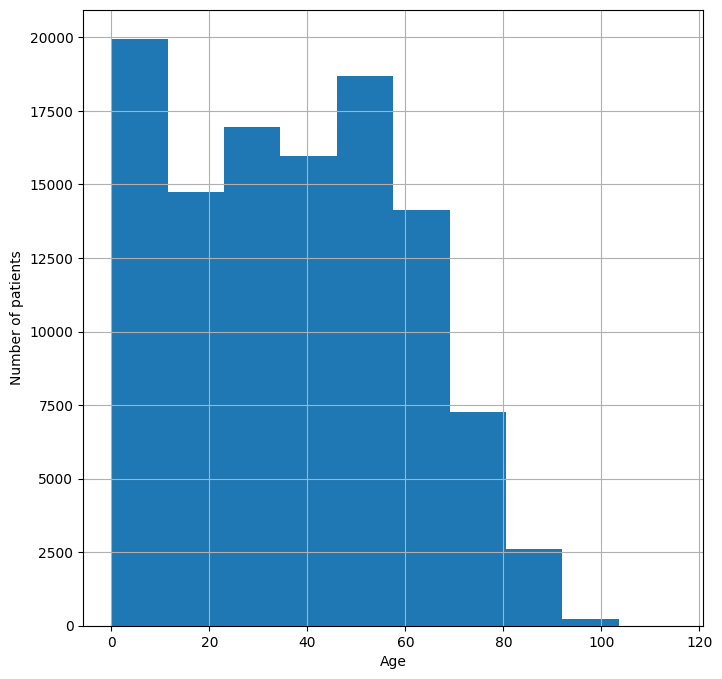

In [16]:
df_no.age.hist(figsize =(8, 8))
plt.xlabel('Age')
plt.ylabel('Number of patients')

**Visual check**
> - completing this to see if there is anything abnormal that shows up that would need a clean. 
>
>Conclusion of visual check
> - The handicap section doesnt follow the same format as the other characteristics so Im going to drop that also. It wa showing the unique values at 1-4 however the visuals didnt show that many above 2. It doesnt affect my analysis questions so I'll remove the column. 
> - Also the alcoholism chart shows quite a low number with 1 I don't think there will be much correlation. This will also be dropped column.

array([[<AxesSubplot: title={'center': 'patient_id'}>,
        <AxesSubplot: title={'center': 'appointment_id'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'scholarship'}>,
        <AxesSubplot: title={'center': 'hypertension'}>,
        <AxesSubplot: title={'center': 'diabetes'}>],
       [<AxesSubplot: title={'center': 'alcoholism'}>,
        <AxesSubplot: title={'center': 'handicap'}>,
        <AxesSubplot: title={'center': 'sms_received'}>]], dtype=object)

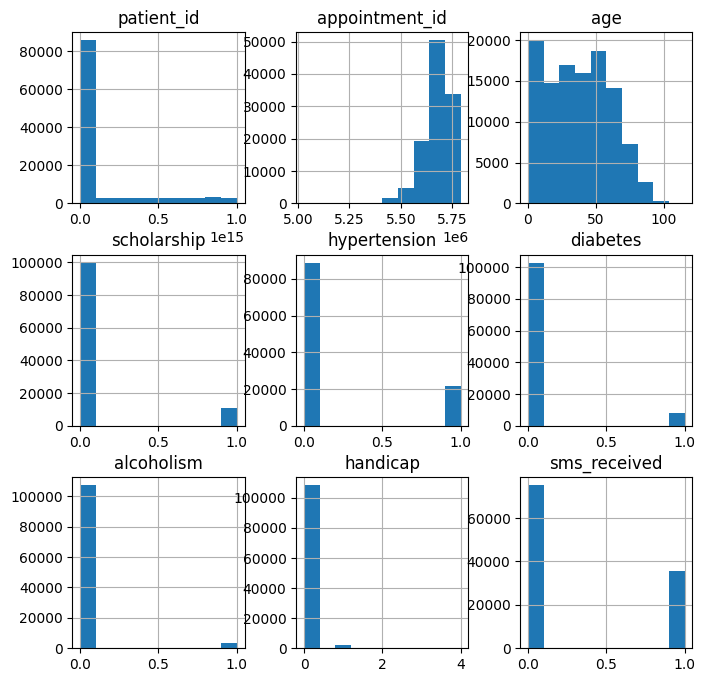

In [17]:
df_no.hist(figsize =(8, 8))

In [18]:
print(df_no['handicap'].unique())

[0 1 2 3 4]


In [19]:
df_no.drop(['handicap', 'alcoholism'], axis=1, inplace=True)

**Reviewing the remaining data**

In [20]:
df_no.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_no['appointment_missed'] = df_no['appointment_missed'].map({'Yes': 1, 'No': 0})

In [22]:
df_no.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,sms_received,appointment_missed
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0


In [23]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   patient_id          110526 non-null  float64
 1   appointment_id      110526 non-null  int64  
 2   gender              110526 non-null  object 
 3   age                 110526 non-null  int64  
 4   neighbourhood       110526 non-null  object 
 5   scholarship         110526 non-null  int64  
 6   hypertension        110526 non-null  int64  
 7   diabetes            110526 non-null  int64  
 8   sms_received        110526 non-null  int64  
 9   appointment_missed  110526 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 9.3+ MB


I referenced here: https://www.includehelp.com/python/change-a-column-of-yes-or-no-to-1-or-0-in-a-pandas-dataframe.aspx

In order to change the no_show from Yes/No to 1/0

<a id='eda'></a>
## Exploratory Data Analysis


### Does age or gender affect how likely someone is to show up for the appointment?

In [24]:
df_age = df_no[['age','appointment_missed']]

In [25]:
df_age_group = df_age.groupby('appointment_missed').mean()
print(df_age_group)

                          age
appointment_missed           
0                   37.790504
1                   34.317667


In [26]:
def appointment_noshow_status(appointment_status):
    """Returns the histogram based on True or False in the column appointment_missed"""
    if appointment_status == 'missed' : 
        Missed = df_no.appointment_missed == True
        return df_no.age[Missed].hist (alpha=1, bins=10, label='Missed')
    else:
        Arrived = df_no.appointment_missed == False
        return df_no.age[Arrived].hist(alpha=0.5, bins=10, label='Arrived')

Text(0, 0.5, 'Patient volume')

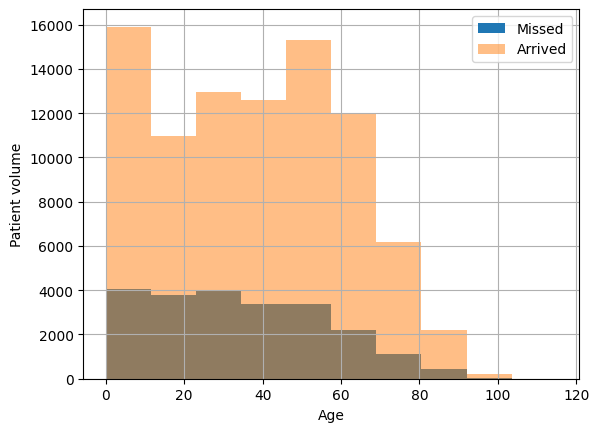

In [27]:
appointment_noshow_status('missed')
appointment_noshow_status('arrived')
plt.legend()

plt.xlabel('Age')
plt.ylabel('Patient volume')

In [28]:
df_age = df_no.pivot_table(values = 'age', index= ['appointment_missed'], columns = 'gender')

In [29]:
df_age.head()

gender,F,M
appointment_missed,,
0,39.591126,34.461372
1,36.162190,30.833010


<AxesSubplot: xlabel='appointment_missed'>

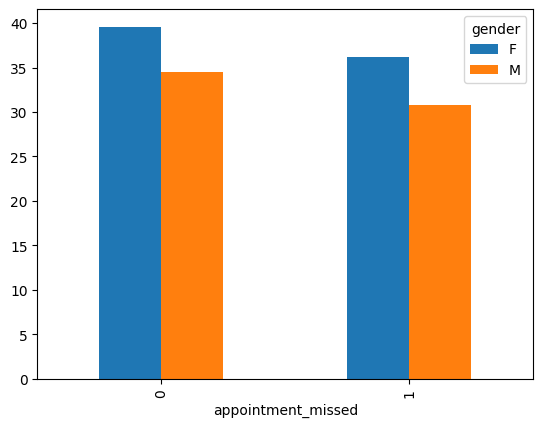

In [30]:
df_age.plot(kind = 'bar')

In [31]:
df_gender = df_no.groupby('appointment_missed')['gender'].value_counts()

In [32]:
df_gender.head()

appointment_missed  gender
0                   F         57245
                    M         30962
1                   F         14594
                    M          7725
Name: gender, dtype: int64

In [33]:
df_gender = df_no.groupby('gender')['appointment_missed'].value_counts()
df_gender.sort_values()

gender  appointment_missed
M       1                      7725
F       1                     14594
M       0                     30962
F       0                     57245
Name: appointment_missed, dtype: int64

Text(0.5, 1.0, 'Gender vs probability of attending appointment')

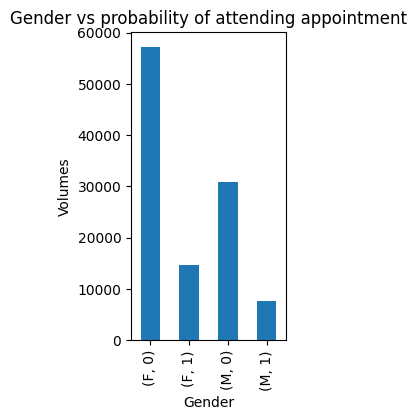

In [34]:
df_gender.plot(kind='bar', figsize = (2, 4))

plt.xlabel('Gender')
plt.ylabel('Volumes')
plt.title('Gender vs probability of attending appointment')

### Research Question 2  (Replace this header name!)

# does an SMS affect if the patient shows up for the appointment?


In [35]:
df_sms = df_no.groupby('sms_received')['appointment_missed'].value_counts()

In [36]:
df_sms.head()

sms_received  appointment_missed
0             0                     62509
              1                     12535
1             0                     25698
              1                      9784
Name: appointment_missed, dtype: int64

<AxesSubplot: xlabel='sms_received,appointment_missed'>

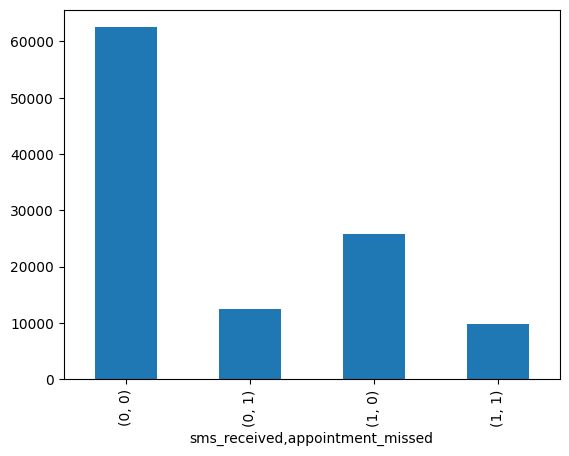

In [37]:
df_sms.plot(kind = 'bar')

In [38]:
total = df_no.groupby('sms_received')['appointment_missed'].count()
proportion = df_sms / total * 100

In [39]:
proportion.head()

sms_received  appointment_missed
0             0                     83.296466
              1                     16.703534
1             0                     72.425455
              1                     27.574545
Name: appointment_missed, dtype: float64

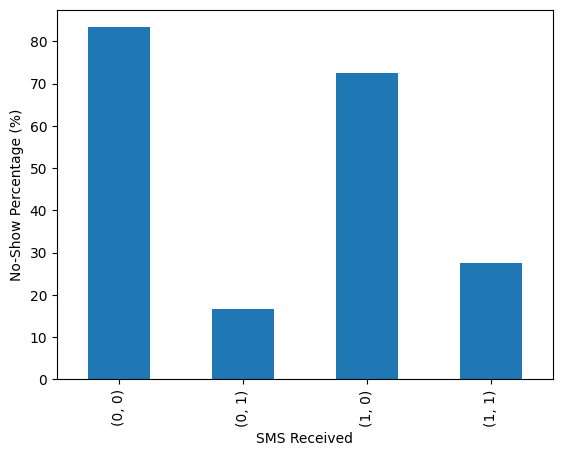

In [40]:
proportion.plot(kind = 'bar')
plt.xlabel('SMS Received')
plt.ylabel('No-Show Percentage (%)')
plt.show()

<a id='conclusions'></a>
## Conclusions



Question1 : Does age or gender affect how likely someone is to show up for the appointment?
> - Based on the visualisations for age, the appointments missed are around 2000 patients until the 40 yeas old. Then the missed appointments goes down after 40, but there is more in line with the decrease in patients at the older age.

> For gender, there are more females than males in the dataset. However based on the average age it looks like older women are more likely to miss an appointment at age 36 vs males who miss an appointment at age 30. 

Question2: Does an SMS affect if the patient shows up for the appointment?

>- It is surprising that more patients showed up for their appointment despite not receiving an SM, it was around 83% of people showed up without SMS vs around 72% who showed up with an SMS. So i would say it doesnt make much of a difference that they we sent the SMS. 

Limitations:
> -  For the age comparisons, its not very accurate as theres quite a lot of individuals with the age zero. This might be a entry error or the medical center is focus on babies perhaps their parents brining them in. 
> - I did not complete any statistical reviews